# Task 1: Implement a Machine Learning Model for Classification problem

## Step 1- Data Preprocessing

In [63]:
#Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
#Importing the Required file
Heart = pd.read_csv("heart.csv")

In [65]:
Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [66]:
#Columns of dataset
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [67]:
#First 5 rows in dataset
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [68]:
#Bottom 5 rows in dataset
Heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [69]:
# Describe functions
Heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
# Number of NULL values
print(Heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [71]:
#total no  of rows and columns
print(Heart.shape)

(1025, 14)


In [72]:
#datatype of each column
print(Heart.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [73]:
#info
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Step 2 - Exploratory Data Analysis(EDA)

In [74]:
Heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
Heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [76]:
#duplicate data
Heart_dup = Heart.duplicated().any()
print(Heart_dup)

True


In [77]:
Heart = Heart.drop_duplicates()

In [78]:
Heart.shape

(302, 14)

In [79]:
#statistics
Heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

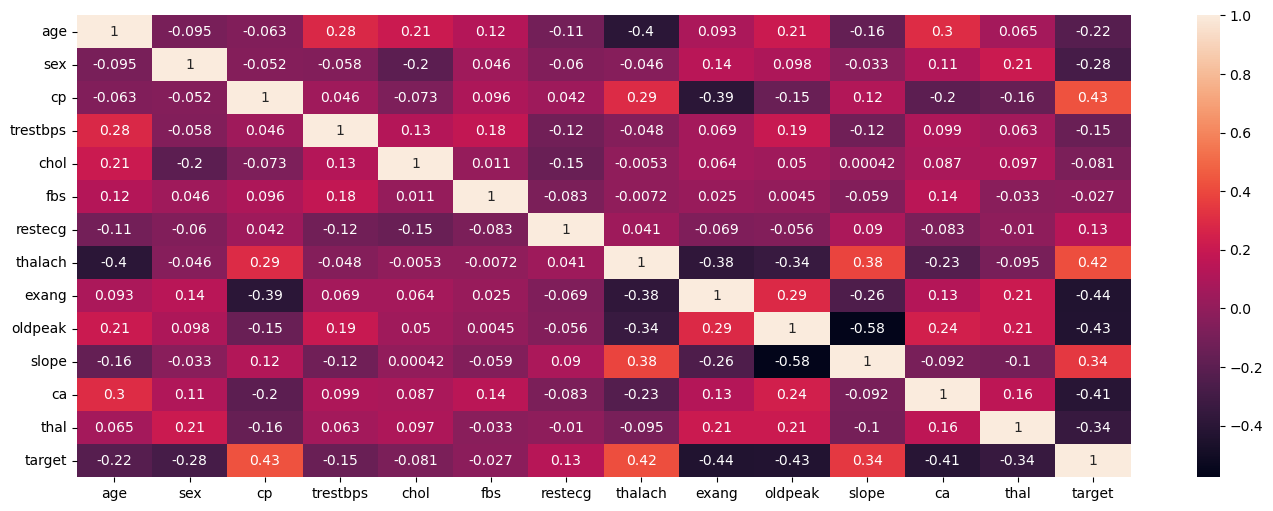

In [80]:
#correlation matrix
plt.figure(figsize=(17,6))
sns.heatmap(Heart.corr(),annot=True)

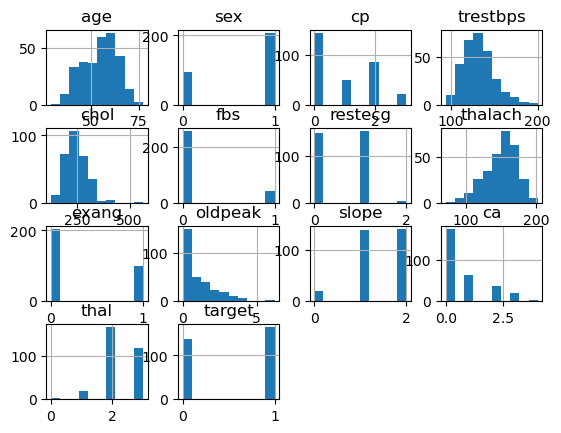

In [81]:
Heart.hist()
plt.show()

In [82]:
#No of people having heart disease and no of people doesnt have heart disease

In [83]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [84]:
Heart['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

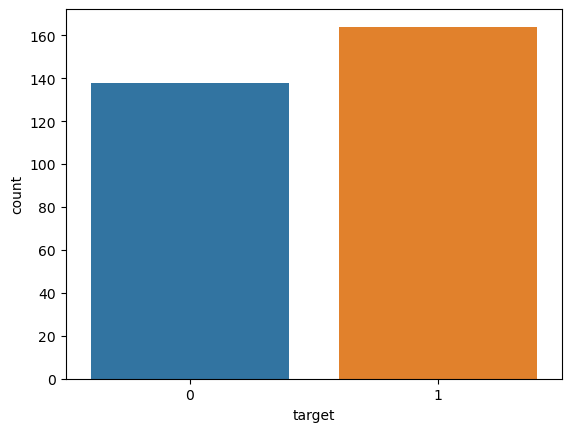

In [85]:
sns.countplot(x=Heart['target'])

In [86]:
#count of male and female

In [87]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [88]:
Heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

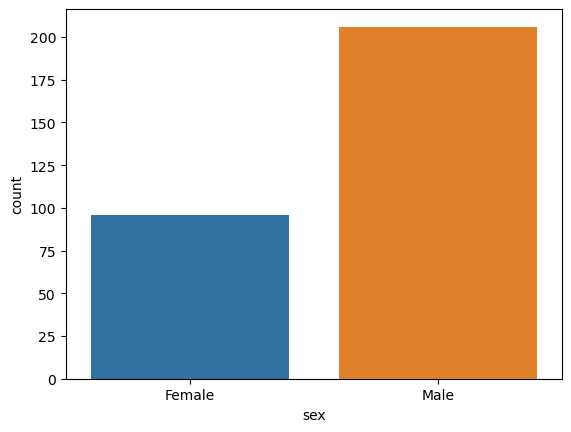

In [89]:
sns.countplot(x= Heart['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

In [90]:
#Gender distribution according to target variable

In [91]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

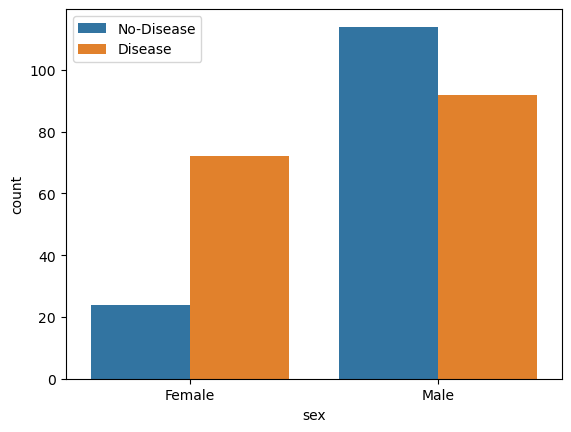

In [92]:
sns.countplot(x='sex',hue='target',data=Heart)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

In [93]:
#Age distribution in dataset

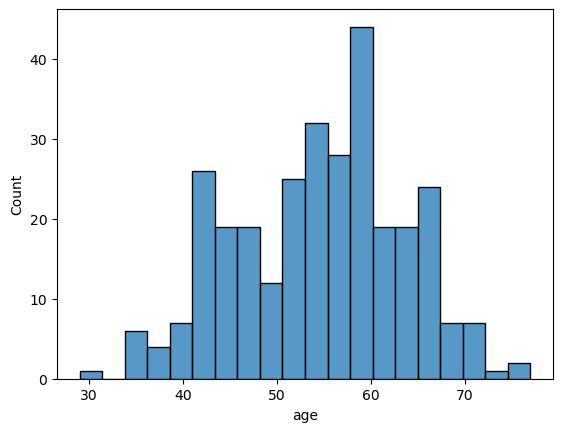

In [94]:
sns.histplot(Heart['age'],bins=20)
plt.show()

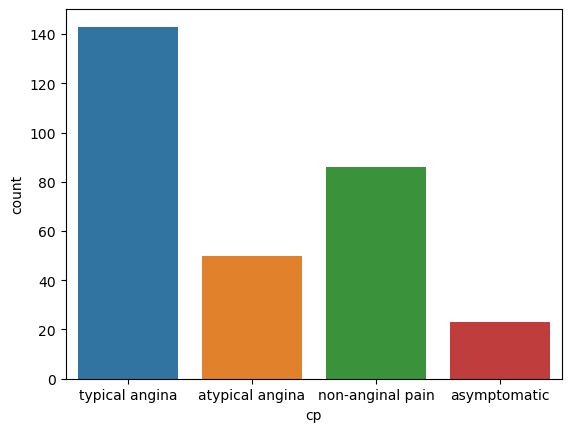

In [95]:
sns.countplot(x=Heart['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()

## Step 3 - Model Implementation

### Training and Testing sets

In [96]:
from sklearn.model_selection import train_test_split
X = Heart.drop('target',axis=1)
y= Heart['target']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [98]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1
62,67,1,0,100,299,0,0,125,1,0.9,1,2,2
39,57,1,2,128,229,0,0,150,0,0.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,61,0,0,130,330,0,0,169,0,0.0,2,0,2
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2
100,43,0,2,122,213,0,1,165,0,0.2,1,0,2
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3


In [99]:
y_train

606    0
720    0
129    1
62     0
39     0
      ..
42     0
85     1
100    1
69     0
11     0
Name: target, Length: 211, dtype: int64

In [100]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
102,54,1,1,108,309,0,1,156,0,0.0,2,0,3
194,67,1,0,160,286,0,0,108,1,1.5,1,3,2
287,71,0,1,160,302,0,1,162,0,0.4,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1
328,70,1,0,130,322,0,0,109,0,2.4,1,3,2
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3


In [101]:
y_test

212    0
8      0
102    1
194    0
287    1
      ..
521    1
98     0
328    0
33     0
268    0
Name: target, Length: 91, dtype: int64

## Support vector machine(SVM)

In [102]:
#Import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import SVC

In [103]:
# define min max scaler
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)


In [104]:
X_train_scaled

array([[ 1.27024111,  0.70459485, -0.90984833, ...,  0.96318322,
         0.29593524, -0.52317786],
       [ 1.05100113,  0.70459485,  1.04911083, ...,  0.96318322,
        -0.72770962, -0.52317786],
       [ 0.2836612 ,  0.70459485, -0.90984833, ..., -0.58820349,
        -0.72770962, -2.1230406 ],
       ...,
       [-1.25101865, -1.41925534,  1.04911083, ..., -0.58820349,
        -0.72770962, -0.52317786],
       [ 0.83176115, -1.41925534, -0.90984833, ..., -2.13959021,
         2.34322497,  1.07668487],
       [-1.25101865, -1.41925534, -0.90984833, ..., -0.58820349,
        -0.72770962,  1.07668487]])

In [105]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [106]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-0.50323392,  0.63245553, -0.99674724, ..., -0.81581702,
        -0.68980584,  1.23235206],
       [-0.95664269,  0.63245553, -0.99674724, ...,  1.0401667 ,
        -0.68980584,  1.23235206],
       [-0.04982514,  0.63245553, -0.0419683 , ...,  1.0401667 ,
        -0.68980584,  1.23235206],
       ...,
       [ 1.76380997,  0.63245553, -0.99674724, ..., -0.81581702,
         2.12089557, -0.49294082],
       [ 1.76380997,  0.63245553,  0.91281063, ..., -0.81581702,
         0.24709463,  1.23235206],
       [ 0.40358364,  0.63245553,  0.91281063, ...,  1.0401667 ,
         1.1839951 ,  1.23235206]])

## Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [108]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf= 7, max_features='sqrt')
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=7, n_estimators=50)

In [109]:
rfpredictions = rf_model.predict(X_test)
rfpredictions_train = rf_model.predict(X_train)

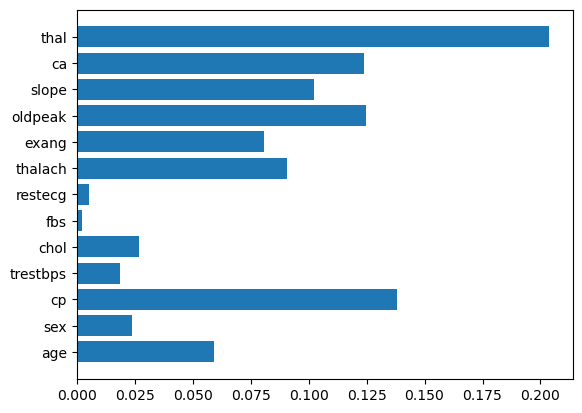

In [110]:
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.show()

## Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [112]:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [113]:
predictions_train = dt_model.predict(X_train)
predictions = dt_model.predict(X_test)

In [114]:
print(classification_report(y_train, predictions_train))
print(accuracy_score(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        99
           1       0.89      0.87      0.88       112

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211

0.8720379146919431


In [115]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        39
           1       0.78      0.73      0.75        52

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

0.7252747252747253


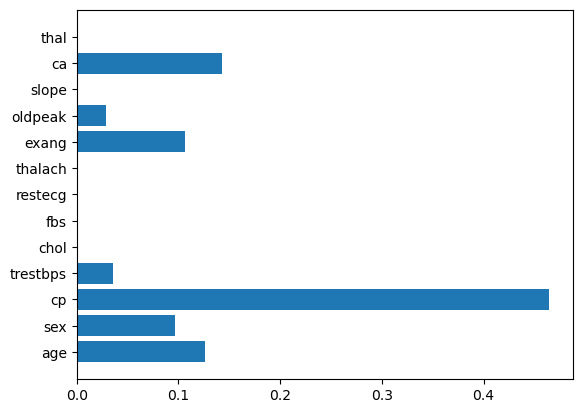

In [116]:
# Feature importance
plt.barh(dt_model.feature_names_in_, dt_model.feature_importances_)
plt.show()

# Step 4:Model Evaluation

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [118]:
# SVM model evaluation
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_confusion = confusion_matrix(y_test, svm_pred)

# Random Forest model evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)

# Decision Tree model evaluation
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)


# Step 5: Cross Validation and Overfitting Check

In [119]:
from sklearn.model_selection import cross_val_score

#Cross validatio on each model
svm_scores = cross_val_score(svm_model, X, y, cv=10)
rf_scores = cross_val_score(rf_model, X, y, cv=10)
dt_scores = cross_val_score(dt_model, X, y, cv=10)

In [120]:
# Calculate mean accuracy scores
svm_mean_accuracy = svm_scores.mean()
rf_mean_accuracy = rf_scores.mean()
dt_mean_accuracy = dt_scores.mean()

In [121]:
# Check for overfitting by comparimg training and testing accuracies
svm_train_accuracy = svm_model.score(X_train, y_train)
rf_train_accuracy = rf_model.score(X_train, y_train)
dt_train_accuracy = dt_model.score(X_train, y_train)

In [122]:
print(svm_mean_accuracy)
print(rf_mean_accuracy)
print(dt_mean_accuracy)

0.655483870967742
0.8341935483870968
0.8147311827956989
